In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [45]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [46]:
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                      perch_weight,
                                                                      random_state=42)

In [47]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [48]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [49]:
print(knr.predict([[50]]))

[1033.33333333]


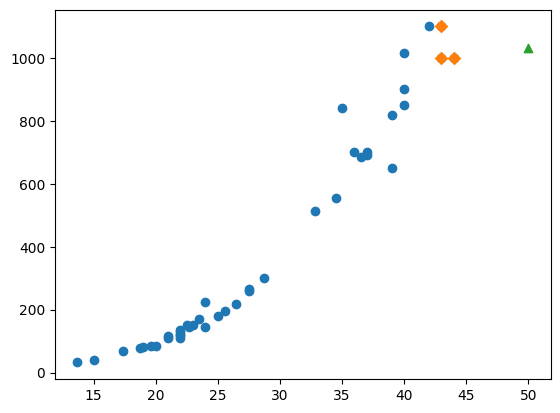

In [50]:
distance, indexes = knr.kneighbors([[50]])

# 훈련셋의 산점도 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.show()

In [51]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [52]:
print(knr.predict([[100000]]))

[1033.33333333]


### k-최근접 이웃의 회귀는 큰 단점을 가지고 있는데, 샘플의 범위 외의 데이터에도 샘플 범위 내의 평균을 출력하기 때문에 회귀법에서 사용하지 않음

In [53]:
# 선형회귀 임포트
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [57]:
lr.fit(train_input, train_target)
print(lr.score(test_input, test_target))

0.824750312331356


In [60]:
lr.predict([[50]])

array([1241.83860323])

In [62]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


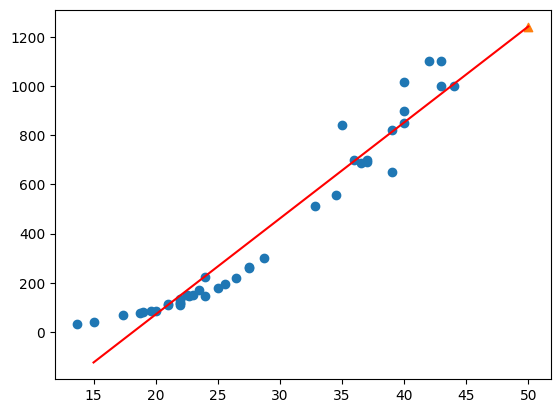

In [68]:
plt.scatter(train_input, train_target)
plt.scatter(50, 1241, marker='^')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], color='red')
plt.show()

In [69]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


# 다항 회귀

In [70]:
train_input ** 2, train_input

(array([[ 384.16],
        [ 484.  ],
        [ 349.69],
        [ 302.76],
        [1296.  ],
        [ 625.  ],
        [1600.  ],
        [1521.  ],
        [1849.  ],
        [ 484.  ],
        [ 400.  ],
        [ 484.  ],
        [ 576.  ],
        [ 756.25],
        [1849.  ],
        [1600.  ],
        [ 576.  ],
        [ 441.  ],
        [ 756.25],
        [1600.  ],
        [1075.84],
        [ 702.25],
        [1332.25],
        [ 187.69],
        [ 515.29],
        [ 225.  ],
        [1369.  ],
        [1225.  ],
        [ 823.69],
        [ 552.25],
        [1521.  ],
        [ 441.  ],
        [ 529.  ],
        [ 484.  ],
        [1936.  ],
        [ 506.25],
        [ 361.  ],
        [1369.  ],
        [ 484.  ],
        [ 655.36],
        [1764.  ],
        [1190.25]]),
 array([[19.6],
        [22. ],
        [18.7],
        [17.4],
        [36. ],
        [25. ],
        [40. ],
        [39. ],
        [43. ],
        [22. ],
        [20. ],
        [22. ],
        

In [72]:
# 2차 방정식의 그래프를 그리기 위해 길이를 제곱한 항을 훈련셋에 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
# 형태 확인
print(train_poly.shape, train_poly.shape)

(42, 2) (42, 2)


In [78]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [80]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [89]:
# 2차방정식의 기울기, 절편 확인
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


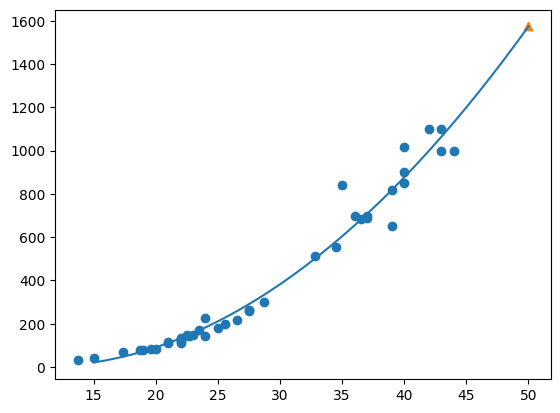

In [94]:
# 구간별 직선을 그리기 위한 15에서 49까지 정수 배열 생성
point = np.arange(15, 51)
# 훈련셋 산점도
plt.scatter(train_input, train_target)
# 15~49까지 2차 방정식 그래프 그리기
plt.plot(point, point**2*lr.coef_[0] + point*lr.coef_[1] + lr.intercept_)
plt.scatter(50, 1573.98423528, marker='^')

In [96]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
